# Weight Tracking 

## for better workout results

***

## Imports

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib
%matplotlib inline

## Data Manipulation

### Load data into a pandas dataframe

** WARNING:** All data is _simulated data_ &rarr; not real 

In [21]:
df = pd.read_csv('.\weight_data.csv', parse_dates=['Date'], index_col = ['Date'])
#df = pd.read_csv('C:\\Users\\Utente\\Desktop\\FlexWorkout\\weight_data.csv', parse_dates=['Date'], index_col = ['Date'])
df.head()

,Weight,Training
Date,,
2020-11-24,66.6,y
2020-11-25,67.2,y
2020-11-26,66.9,n
2020-11-27,66.5,y
2020-11-28,66.6,y


### Compute daily weight difference

Difference is computed as   Weight_day2 - Weight_day1.

Positive differences mean weight gain, negative differences mean weight loss. 

In [22]:
df['Diff'] = df['Weight'].diff(periods = 1)
df['Diff'] = df['Diff'].fillna(0)

### Quick look at the data

In [23]:
print(df.describe(include=np.number))
print('\n')
print(df.describe(include=[object]))

          Weight       Diff
count  74.000000  74.000000
mean   68.406757   0.043243
std     1.175589   0.342865
min    66.300000  -0.800000
25%    67.300000  -0.275000
50%    68.800000   0.100000
75%    69.300000   0.300000
max    70.500000   0.800000


       Training
count        74
unique        2
top           y
freq         52


In [24]:
print(df.head(10))

            Weight Training  Diff
Date                             
2020-11-24    66.6        y   0.0
2020-11-25    67.2        y   0.6
2020-11-26    66.9        n  -0.3
2020-11-27    66.5        y  -0.4
2020-11-28    66.6        y   0.1
2020-11-29    66.9        y   0.3
2020-11-30    67.3        y   0.4
2020-12-01    67.2        n  -0.1
2020-12-02    67.5        y   0.3
2020-12-03    67.8        n   0.3


### Split data into training days and non-training days

In [25]:
df_y = df[df['Training'].str.contains('y')]
df_n = df[df['Training'].str.contains('n')]

In [26]:
print(df_y.head())
print('\n')
print(df_n.head())

            Weight Training  Diff
Date                             
2020-11-24    66.6        y   0.0
2020-11-25    67.2        y   0.6
2020-11-27    66.5        y  -0.4
2020-11-28    66.6        y   0.1
2020-11-29    66.9        y   0.3


            Weight Training  Diff
Date                             
2020-11-26    66.9        n  -0.3
2020-12-01    67.2        n  -0.1
2020-12-03    67.8        n   0.3
2020-12-07    67.1        n   0.3
2020-12-08    66.9        n  -0.2


## Data Visualization

### Weight trend

In [27]:
def weight_trend_settings(df, ax):

    ax.tick_params(axis = 'x', which = 'major', labelsize = 18, direction = 'out', length = 7, rotation = 15)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 18, direction = 'out', length = 7)
    ax.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'out', length = 3)
    ax.tick_params(axis = 'x', which = 'minor', bottom = False)
    ax.set_yticks(ticks = ax.get_yticks(), minor = True)
    ax.minorticks_on()

    ax.set_xlabel('Date', fontsize = 0, loc = 'center')
    ax.set_ylabel('Weight (kg)', fontsize = 24, loc = 'center', labelpad = 15)
    ax.set_title('Weight trend', fontsize = 32)

    date_form = DateFormatter("%d %b")
    ax.xaxis.set_major_formatter(date_form)

    MAX = df['Weight'].max() + 0.5 
    MIN = df['Weight'].min() - 0.5 

    ax.set_ylim(bottom = MIN, top = MAX)

    ax.legend(loc = 'lower right', prop = {'size': 20}, ncol = 1, frameon = True, fancybox = True, framealpha = 1)

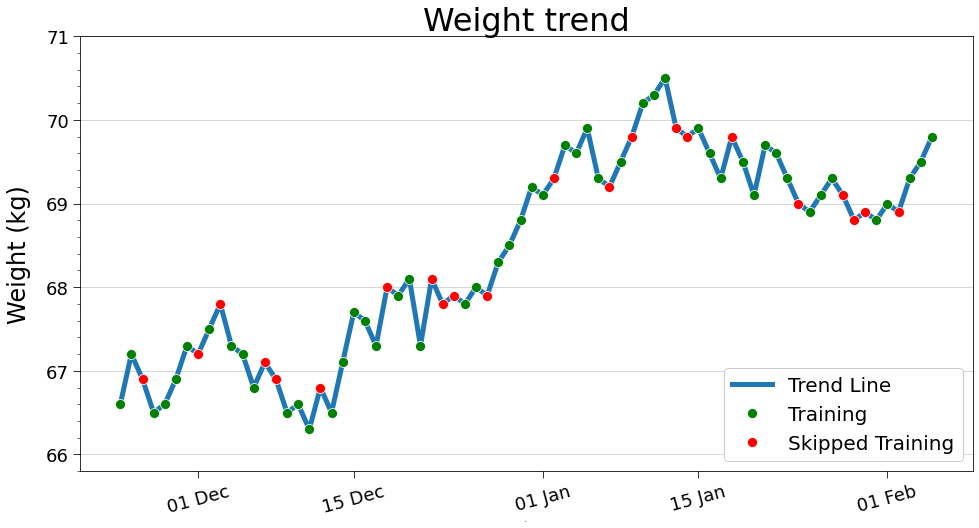

In [28]:
fig1 = plt.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.set_axisbelow(True)
ax1.grid(axis='y', linewidth = .5)

sns.lineplot(x = 'Date', y = 'Weight', data = df, dashes = False, linewidth = 5, ax = ax1, zorder = 1, label='Trend Line')
sns.lineplot(x = 'Date', y = 'Weight', data = df_y, marker="o", markersize = 10, dashes = False, ax = ax1, linewidth = 0, color = 'g', zorder = 2, label='Training')
sns.lineplot(x = 'Date', y = 'Weight', data = df_n, marker="o", markersize = 10, dashes = False, ax = ax1, linewidth = 0, color = 'r', zorder = 3, label='Skipped Training')

weight_trend_settings(df, ax1)
BOTTOM, TOP = ax1.get_ylim()

#fig1.savefig('./Plots/weight_trend.png', dpi = 300, facecolor = 'white')
plt.show()

### Weight distribution

In [29]:
def weight_distr_settings(ax, BOTTOM, TOP):

    ax.tick_params(axis = 'x', which = 'major', labelsize = 18, direction = 'out', length = 7, rotation = 15)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 18, direction = 'out', length = 7)
    ax.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'out', length = 3)
    ax.tick_params(axis = 'x', which = 'minor', bottom = False)
    ax.set_yticks(ticks = ax.get_yticks(), minor = True)
    ax.minorticks_on()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax.set_xlabel('Weight (kg)', fontsize = 24, loc = 'center')
    ax.set_ylabel('Counts', fontsize = 24, loc = 'center')
    ax.set_title('Weight distribution', fontsize = 32)

    ax.set_xlim(left = BOTTOM, right = TOP)

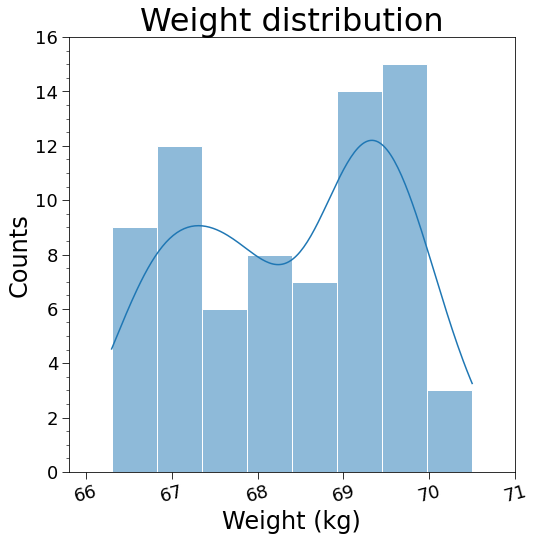

In [30]:
fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(1,1,1)

sns.histplot(data = df, x = 'Weight', stat = 'count', element = 'bars', edgecolor = 'white', kde = True, ax = ax2)
weight_distr_settings(ax2, BOTTOM, TOP)

#fig2.savefig('./Plots/weight_distr.png', dpi = 300, facecolor = 'white')
plt.show()

### Daily weight difference

In [31]:
def diff_trend_settings(df, ax):

    ax.tick_params(axis = 'x', which = 'major', labelsize = 18, direction = 'out', length = 7, rotation = 15)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 18, direction = 'out', length = 7)
    ax.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'out', length = 3)
    ax.tick_params(axis = 'x', which = 'minor', bottom = False)
    ax.set_yticks(ticks = ax.get_yticks(), minor = True)
    ax.minorticks_on()

    ax.set_xlabel('Date', fontsize = 0, loc = 'center')
    ax.set_ylabel('Weight difference (kg)', fontsize = 24, loc = 'center', labelpad = 15)
    ax.set_title('Daily weight difference trend', fontsize = 32)

    date_form = DateFormatter("%d %b")
    ax.xaxis.set_major_formatter(date_form)

    MAX = df['Diff'].max() + 0.2 
    MIN = df['Diff'].min() - 0.2 

    ax.set_ylim(bottom = MIN, top = MAX)

    ax.legend(loc = 'lower right', prop = {'size': 20}, ncol = 1, frameon = True, fancybox = True, framealpha = 1)

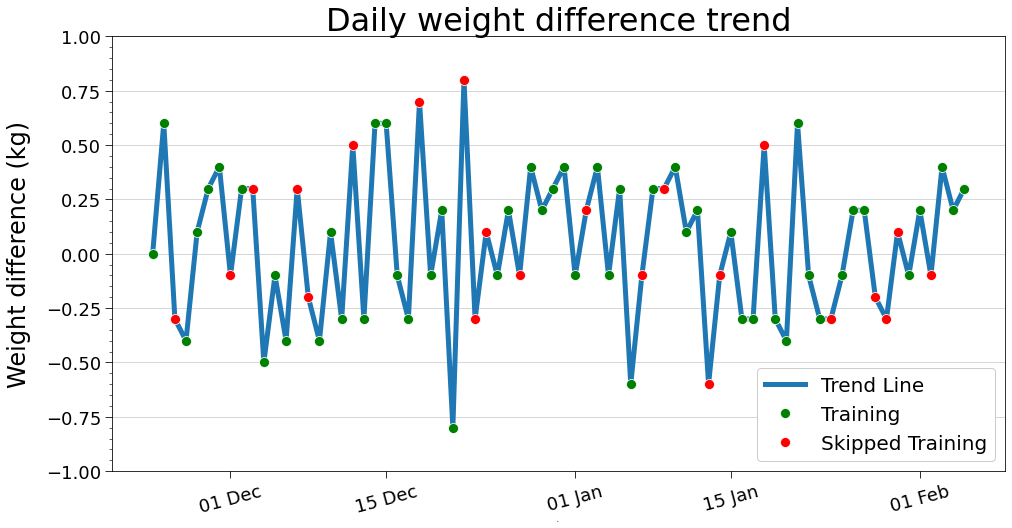

In [32]:
fig3 = plt.figure(figsize=(16,8))
ax3 = fig3.add_subplot(1,1,1)
ax3.set_axisbelow(True)
ax3.grid(axis='y', linewidth = .5)

sns.lineplot(x = 'Date', y = 'Diff', data = df, dashes = False, linewidth = 5, ax = ax3, zorder = 1, label='Trend Line')
sns.lineplot(x = 'Date', y = 'Diff', data = df_y, marker="o", markersize = 10, dashes = False, ax = ax3, linewidth = 0, color = 'g', zorder = 2, label='Training')
sns.lineplot(x = 'Date', y = 'Diff', data = df_n, marker="o", markersize = 10, dashes = False, ax = ax3, linewidth = 0, color = 'r', zorder = 3, label='Skipped Training')

diff_trend_settings(df, ax3)
BOTTOM2, TOP2 = ax3.get_ylim()

#fig3.savefig('./Plots/diff_trend.png', dpi = 300, facecolor = 'white')

plt.show()

### Weight difference distribution

To show a relevant weight difference distribution it is necessary to make some feature engineering.

Weight difference data as it is can result misleading, expecially if the hue = "Trainin" is taken into account. This happens because weight measurements happen in the morning, while training sessions usually find place in the late afternoon. Data shows if weight has been gained or lost, but "Training" happens later: it is more useful to track if weight has been gained/lost knowing the "Training" situation of the day _before_!

New data then answers the question: "Yesterday I trained (did not train), how much weight did I gain/loose?".

It is clear now that previous data did not make any sense!

In [33]:
df['New Training'] = df['Training'].shift(+1)

In [34]:
def diff_distr_settings(ax, g, BOTTOM, TOP):

    ax.tick_params(axis = 'x', which = 'major', labelsize = 18, direction = 'out', length = 7, rotation = 15)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 18, direction = 'out', length = 7)
    ax.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'out', length = 3)
    ax.tick_params(axis = 'x', which = 'minor', bottom = False)
    ax.set_yticks(ticks = ax.get_yticks(), minor = True)
    ax.minorticks_on()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax.set_xlabel('Weight (kg)', fontsize = 24, loc = 'center')
    ax.set_ylabel('Counts', fontsize = 24, loc = 'center')
    ax.set_title('Weight difference distr', fontsize = 32)

    ax.set_xlim(left = BOTTOM, right = TOP)

    plt.setp(ax.get_legend().get_texts(), fontsize='22')
    plt.setp(ax.get_legend().get_title(), fontsize='28')

    g.legend_.set_title('')

    new_labels = ['Training', 'Skipped Training']
    for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)

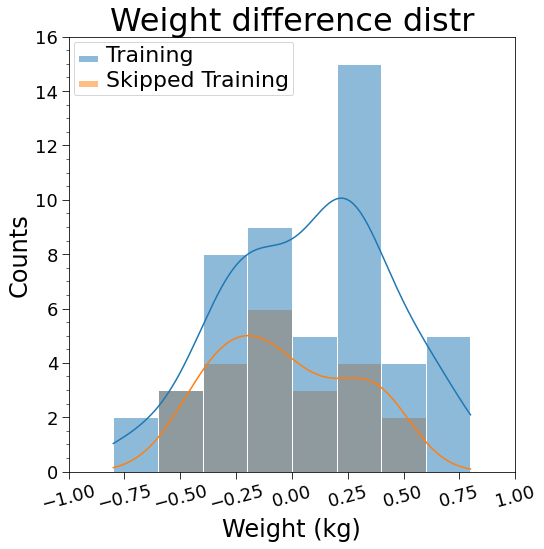

In [35]:
fig4 = plt.figure(figsize=(8,8))
ax4 = fig4.add_subplot(1,1,1)

g = sns.histplot(data = df, x = 'Diff', hue = 'New Training', stat = 'count', element = 'bars', edgecolor = 'white', kde = True, ax = ax4, legend = True)
diff_distr_settings(ax4, g, BOTTOM2, TOP2)

#fig4.savefig('./Plots/diff_distr.png', dpi = 300, facecolor = 'white')

plt.show()

### Weight gain/loss distributions

In [36]:
df['Gain'] = ''

for i in range(len(df['Diff'])):

    if df['Diff'].iloc[i] >= 0:
        df['Gain'].iloc[i] = 'gain'

    elif df['Diff'].iloc[i] < 0:
        df['Gain'].iloc[i] = 'loss'

df.tail(7)

,Weight,Training,Diff,New Training,Gain
Date,,,,,
2021-01-30,68.9,n,0.1,n,gain
2021-01-31,68.8,y,-0.1,n,loss
2021-02-01,69.0,y,0.2,y,gain
2021-02-02,68.9,n,-0.1,y,loss
2021-02-03,69.3,y,0.4,n,gain
2021-02-04,69.5,y,0.2,y,gain
2021-02-05,69.8,y,0.3,y,gain


In [42]:
def gainloss_distr_settings(ax, g, BOTTOM, TOP):

    ax.tick_params(axis = 'x', which = 'major', labelsize = 18, direction = 'out', length = 7, rotation = 15)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 18, direction = 'out', length = 7)
    ax.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'out', length = 3)
    ax.tick_params(axis = 'x', which = 'minor', bottom = False)
    ax.set_yticks(ticks = ax.get_yticks(), minor = True)
    ax.minorticks_on()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax.set_xlabel('Weight (kg)', fontsize = 24, loc = 'center')
    ax.set_ylabel('Counts', fontsize = 24, loc = 'center')
    ax.set_title('Weight gain/loss distr', fontsize = 32)

    ax.set_xlim(left = BOTTOM, right = TOP)

    plt.setp(ax.get_legend().get_texts(), fontsize='22')
    plt.setp(ax.get_legend().get_title(), fontsize='28')

    g.legend_.set_title('')

    new_labels = ['Weight Gain', 'Weight Loss']
    for t, l in zip(g.legend_.texts, new_labels): t.set_text(l)

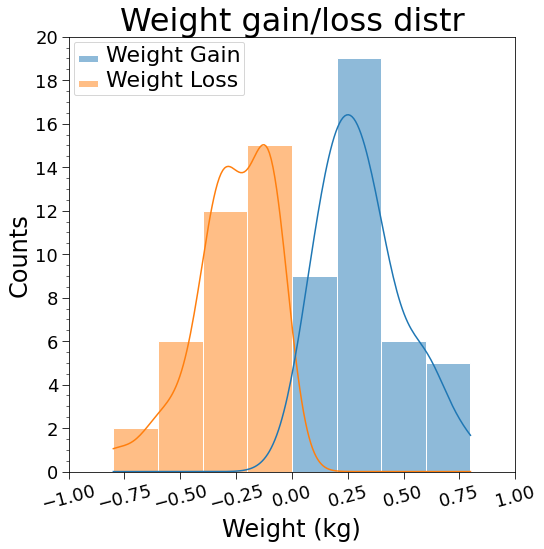

In [43]:
fig5 = plt.figure(figsize=(8,8))
ax5 = fig5.add_subplot(1,1,1)

g1 = sns.histplot(data = df, x = 'Diff', hue = 'Gain', stat = 'count', element = 'bars', edgecolor = 'white', kde = True, ax = ax5, legend = True)

gainloss_distr_settings(ax5, g1, BOTTOM2, TOP2)

#fig5.savefig('./Plots/diff_distr.png', dpi = 300, facecolor = 'white')

plt.show()

In [39]:
df['New Training'].fillna('a')

Date
2020-11-24     a
2020-11-25     y
2020-11-26     y
2020-11-27     n
2020-11-28     y
              ..
2021-02-01     y
2021-02-02     y
2021-02-03     n
2021-02-04     y
2021-02-05     y
Name: New Training, Length: 74, dtype: object

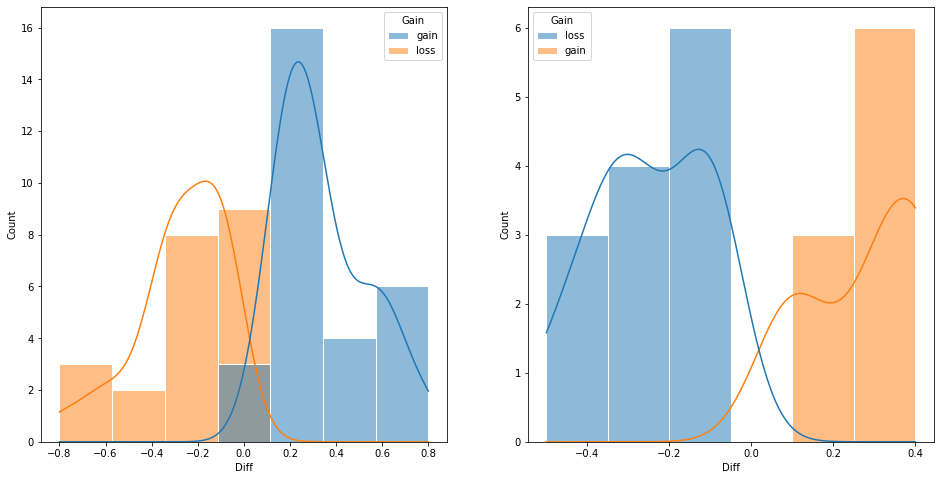

In [40]:
fig6 = plt.figure(figsize=(16,8))
ax6 = fig6.add_subplot(1,2,1)
ax7 = fig6.add_subplot(1,2,2)

df_y2 = df[df['New Training'].str.contains('y', na=False)]
df_n2 = df[df['New Training'].str.contains('n', na=False)]

g1 = sns.histplot(data = df_y2, x = 'Diff', hue = 'Gain', stat = 'count', element = 'bars', edgecolor = 'white', kde = True, ax = ax6, legend = True)
g2 = sns.histplot(data = df_n2, x = 'Diff', hue = 'Gain', stat = 'count', element = 'bars', edgecolor = 'white', kde = True, ax = ax7, legend = True)

#fig5.savefig('./Plots/diff_distr.png', dpi = 300, facecolor = 'white')

plt.show()

## TO DO

**Positive and negative differences distribution** &rarr; to see how much I tend to gain/loose

* Also distinguish between training days and non-training days

**Show correlation between training days and weight gain/loss**





